# AIM- COMPARE UNEMPLOYMENT RATE WITH GAINS IN STOCK MARKET.

In [1]:
### FIRST IMPORT ALL LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\wel'

# TO COMPARE OUR FIRST STEP IS TO COLLECT DATA .FOR THAT I HAVE MADE EXCEL DATA HAVING TWO COLUMNS -FIRST IS UNEMPLOYMENT RATE YEARLY WISE AND SECOND ONE IS STOCK PRICE INDEX OF ANY OF STOCK MARKET

In [3]:
data=pd.read_csv('un.csv')
df=pd.DataFrame(data)
df

,Unem_rate,stock
0,3,4000
1,4,8000
2,5,12000
3,6,16000
4,7,20000
5,8,24000
6,9,28000
7,10,32000
8,11,36000
9,12,40000


In [4]:
### Give statistical data
df.describe()

,Unem_rate,stock
count,19.000000,19.000000
mean,12.000000,39894.736842
std,5.627314,22335.558936
min,3.000000,4000.000000
25%,7.500000,22000.000000
50%,12.000000,40000.000000
75%,16.500000,58000.000000
max,21.000000,74000.000000


# IMPLEMENTATION OF REGRESSION USING SK LEARN

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
X=df.drop(['stock'],axis=1)

In [7]:
X

,Unem_rate
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10
8,11
9,12


In [8]:
Y=df.stock

In [9]:
Y

0      4000
1      8000
2     12000
3     16000
4     20000
5     24000
6     28000
7     32000
8     36000
9     40000
10    44000
11    48000
12    52000
13    56000
14    60000
15    64000
16    68000
17    72000
18    74000
Name: stock, dtype: int64

# TRAIN AND TEST DATA-USING TRAIN-TEST-SPLIT TO SPLIT OUR DATA 

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [11]:
X_train

,Unem_rate
14,17
16,19
6,9
4,7
2,5
5,8
13,16
9,12
7,10
17,20


In [12]:
Y_train

14    60000
16    68000
6     28000
4     20000
2     12000
5     24000
13    56000
9     40000
7     32000
17    72000
11    48000
3     16000
0      4000
15    64000
12    52000
Name: stock, dtype: int64

In [13]:
X_test

,Unem_rate
10,13
1,4
8,11
18,21


In [14]:
Y_test

10    44000
1      8000
8     36000
18    74000
Name: stock, dtype: int64

In [15]:
###WE CALL OUR ESTIMATOR INSTANCE 'model'
model=LinearRegression()

In [16]:
### PASS OUR TRAINING DATASET TO THE FIT METHOD
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
##WE USE OUR TEST SET TO RUN PREDICTIONS
y_predict=model.predict(X_test)

In [18]:
y_predict

array([44000.,  8000., 36000., 76000.])

In [19]:
model.score(X_test,Y_test)

0.9981908638625057

In [20]:
model.intercept_

-8000.000000000007

In [21]:
model.coef_

array([4000.])

# VISUALISATION - WE CAN CONCLUDE THAT UNEMPLOYMENT AND STOCK HAVING INVERSE CORRELATION.

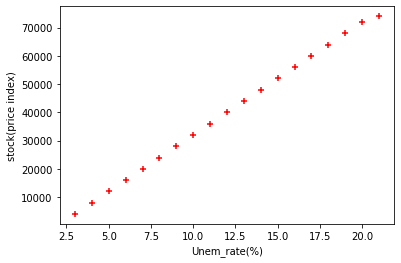

In [22]:
%matplotlib inline
plt.xlabel('Unem_rate(%)')
plt.ylabel('stock(price index)')
plt.scatter(df.Unem_rate,df.stock,color='red',marker='+')

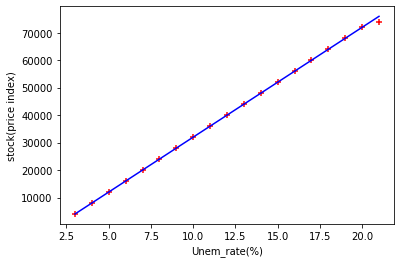

In [23]:
plt.xlabel('Unem_rate(%)')
plt.ylabel('stock(price index)')
plt.scatter(df.Unem_rate,df.stock,color='red',marker='+')
plt.plot(df.Unem_rate,model.predict(df[['Unem_rate']]),color='blue')


# WE GET BEST FIT LINE OF REGRESSION WITH ACCURACY OF 99%